In [7]:
import os
os.chdir("/home/arghya/Documents/LOAN_DEFAULTER_pred_Hacker_earth")
os.getcwd()

'/home/arghya/Documents/LOAN_DEFAULTER_pred_Hacker_earth'

In [6]:
print('Importing packages...')
from datetime import datetime
import numpy as np
import pandas as pd
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

Importing packages...


/home/arghya/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
print('Reading data...')
dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')
# All Available Columns: 'member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'sub_grade', 'term', 'batch_enrolled', 'desc', 'grade', 'emp_length', 'int_rate', 'pymnt_plan', 'initial_list_status', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type', 'verification_status_joint', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status
dfTrain = dfTrain[['member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'funded_amnt_inv', 'sub_grade', 'term', 'emp_length', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']]
dfTest = dfTest[['member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'funded_amnt_inv', 'sub_grade', 'term', 'emp_length', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]

Reading data...


In [9]:
'''
Data transformation/cleanup
Strip off textual parts, represent values as numeric values
it makes sense. Convert the datatype to numeric.
'''
print('Transform: term...')
dfTrain['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dfTest['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dfTrain['term'] = pd.to_numeric(dfTrain['term'], errors='coerce')
dfTest['term'] = pd.to_numeric(dfTest['term'], errors='coerce')

print('Transform: emp_length...')
dfTrain['emp_length'].replace('n/a', '0', inplace=True)
dfTrain['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dfTest['emp_length'].replace('n/a', '0', inplace=True)
dfTest['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dfTrain['emp_length'] = pd.to_numeric(dfTrain['emp_length'], errors='coerce')
dfTest['emp_length'] = pd.to_numeric(dfTest['emp_length'], errors='coerce')

print('Transform: last_week_pay...')
dfTrain['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dfTest['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dfTrain['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dfTest['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dfTrain['last_week_pay'] = pd.to_numeric(dfTrain['last_week_pay'], errors='coerce')
dfTest['last_week_pay'] = pd.to_numeric(dfTest['last_week_pay'], errors='coerce')

print('Transform: sub_grade...')
dfTrain['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dfTrain['sub_grade'] = pd.to_numeric(dfTrain['sub_grade'], errors='coerce')
dfTest['sub_grade'] = pd.to_numeric(dfTest['sub_grade'], errors='coerce')

print('Transform done.')

Transform: term...
Transform: emp_length...
Transform: last_week_pay...
Transform: sub_grade...
Transform done.


In [10]:
'''
Missing values imputation
'''
cols = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in cols:
    print('Imputation with Median: %s' % (col))
    dfTrain[col].fillna(dfTrain[col].median(), inplace=True)
    dfTest[col].fillna(dfTest[col].median(), inplace=True)

cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in cols:
    print('Imputation with Zero: %s' % (col))
    dfTrain[col].fillna(0, inplace=True)
    dfTest[col].fillna(0, inplace=True)

print('Missing value imputation done.')

Imputation with Median: term
Imputation with Median: loan_amnt
Imputation with Median: funded_amnt
Imputation with Median: last_week_pay
Imputation with Median: int_rate
Imputation with Median: sub_grade
Imputation with Median: annual_inc
Imputation with Median: dti
Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: open_acc
Imputation with Median: revol_bal
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: total_rec_int
Imputation with Median: mths_since_last_major_derog
Imputation with Median: tot_coll_amt
Imputation with Median: tot_cur_bal
Imputation with Median: total_rev_hi_lim
Imputation with Median: emp_length
Imputation with Zero: acc_now_delinq
Imputation with Zero: total_rec_late_fee
Imputation with Zero: recoveries
Imputation with Zero: collection_recovery_fee
Imputation with Zero: collections_12_mths_ex_med
Missing value imputation done.


In [11]:
# Columns home_ownership and purpose columns attributes were earlier included and were considered categorical
# But since the feature importance was low, they were removed. Keeping this section here for sake of completeness
# of data preprocessing steps for reference, to dummify/categorize variables, update list of attributes cat_attr

#cat_attr = ['home_ownership', 'purpose']
#for cat in cat_attr:
#    print('Categorizing: %s...' % (cat))
#    df_col = [cat]
#    dfTrain[cat] = dfTrain[cat].astype("category")
#    dfTrain[cat] = pd.get_dummies(dfTrain, columns=df_col)
#    dfTest[cat] = dfTest[cat].astype("category")
#    dfTest[cat] = pd.get_dummies(dfTest, columns=df_col)


In [12]:
'''
Feature Engineering
'''

# Separating the member_id column of test dataframe to help create a csv after predictions
test_member_id = pd.DataFrame(dfTest['member_id'])


# Creating target variable pandas series from train dataframe, this will be used by cross validation to calculate
# the accuracy of the model
train_target = pd.DataFrame(dfTrain['loan_status'])


# It's good to create a copy of train and test dataframes. this way we can play around different features as we tune the
# performance of the classifier with important features
selected_cols = ['member_id', 'emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'mths_since_last_major_derog', 'last_week_pay', 'tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt', 'recoveries', 'collection_recovery_fee', 'term', 'acc_now_delinq', 'collections_12_mths_ex_med']
finalTrain = dfTrain[selected_cols]
finalTest = dfTest[selected_cols]

# How big the loan a person has taken with respect to his earnings, annual income to loan amount ratio
finalTrain['loan_to_income'] = finalTrain['annual_inc']/finalTrain['funded_amnt_inv']
finalTest['loan_to_income'] = finalTest['annual_inc']/finalTest['funded_amnt_inv']


# All these attributes indicate that the repayment was not all hunky-dory. All the amounts caclulated are ratios 
# like, recovery to the loan amount. This column gives a magnitude of how much the repayment has gone off course 
# in terms of ratios.
finalTrain['bad_state'] = finalTrain['acc_now_delinq'] + (finalTrain['total_rec_late_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['recoveries']/finalTrain['funded_amnt_inv']) + (finalTrain['collection_recovery_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTrain['funded_amnt_inv'])
finalTest['bad_state'] = finalTest['acc_now_delinq'] + (finalTest['total_rec_late_fee']/finalTest['funded_amnt_inv']) + (finalTest['recoveries']/finalTest['funded_amnt_inv']) + (finalTest['collection_recovery_fee']/finalTest['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTest['funded_amnt_inv'])

# For the sake of this model, I have used just a boolean flag if things had gone bad, with this case I didn't see
# a benifit of including above computations
finalTrain.loc[finalTrain['bad_state'] > 0, 'bad_state'] = 1
finalTest.loc[finalTest['bad_state'] > 0, 'bad_state'] = 1


# Total number of available/unused 'credit lines'
finalTrain['avl_lines'] = finalTrain['total_acc'] - finalTrain['open_acc']
finalTest['avl_lines'] = finalTest['total_acc'] - finalTest['open_acc']


# Interest paid so far
finalTrain['int_paid'] = finalTrain['total_rec_int'] + finalTrain['total_rec_late_fee']
finalTest['int_paid'] = finalTest['total_rec_int'] + finalTest['total_rec_late_fee']


# Calculating EMIs paid (in terms of percent)
finalTrain['emi_paid_progress_perc'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100)
finalTest['emi_paid_progress_perc'] = ((finalTest['last_week_pay']/(finalTest['term']/12*52+1))*100)


# Calculating total repayments received so far, in terms of EMI or recoveries after charge off
finalTrain['total_repayment_progress'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100) + ((finalTrain['recoveries']/finalTrain['funded_amnt_inv']) * 100)
finalTest['total_repayment_progress'] = ((finalTest['last_week_pay']/(finalTest['term']/12*52+1))*100) + ((finalTest['recoveries']/finalTest['funded_amnt_inv']) * 100)

/home/arghya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/arghya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/arghya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [13]:
'''
Split data set into train-test-cv
Train model & predict
'''
# Split train and cross validation sets
X_train, X_test, y_train, y_test = train_test_split(np.array(finalTrain), np.array(train_target), test_size=0.30)
eval_set=[(X_test, y_test)]

Initializing xgboost.sklearn.XGBClassifier and starting training...


/home/arghya/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/arghya/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.968369
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.969614
[2]	validation_0-auc:0.96984
[3]	validation_0-auc:0.97047
[4]	validation_0-auc:0.970769
[5]	validation_0-auc:0.971069
[6]	validation_0-auc:0.971264
[7]	validation_0-auc:0.971378
[8]	validation_0-auc:0.971808
[9]	validation_0-auc:0.971904
[10]	validation_0-auc:0.972086
[11]	validation_0-auc:0.972217
[12]	validation_0-auc:0.972189
[13]	validation_0-auc:0.972215
[14]	validation_0-auc:0.972291
[15]	validation_0-auc:0.972327
[16]	validation_0-auc:0.972403
[17]	validation_0-auc:0.972422
[18]	validation_0-auc:0.972445
[19]	validation_0-auc:0.972558
[20]	validation_0-auc:0.972629
[21]	validation_0-auc:0.972657
[22]	validation_0-auc:0.972699
[23]	validation_0-auc:0.972748
[24]	validation_0-auc:0.972741
[25]	validation_0-auc:0.972879
[26]	validation_0-auc:0.972933
[27]	validation_0-auc:0.972985
[28]	validation_0-auc:0.973027
[29]	validation_0-auc:0.973031
[30]	validation_0-

/home/arghya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


[ 0.18788983  0.01579263  0.01833741  0.00169652  0.00923108  0.03717379
  0.04732798  0.04263759  0.05758196  0.0207824   0.01384661  0.02023352
  0.03904496  0.05084576  0.01733945  0.04917419  0.01559303  0.01085275
  0.12963425  0.05279178  0.03168505  0.00950551  0.00845766  0.
  0.01060326  0.00022454  0.00047403  0.04603064  0.00508957  0.02644579
  0.00616237  0.01234968  0.00516441]
0 member_id
1 emp_length
2 loan_amnt
3 funded_amnt
4 funded_amnt_inv
5 sub_grade
6 int_rate
7 annual_inc
8 dti
9 mths_since_last_delinq
10 mths_since_last_record
11 open_acc
12 revol_bal
13 revol_util
14 total_acc
15 total_rec_int
16 total_rec_late_fee
17 mths_since_last_major_derog
18 last_week_pay
19 tot_cur_bal
20 total_rev_hi_lim
21 tot_coll_amt
22 recoveries
23 collection_recovery_fee
24 term
25 acc_now_delinq
26 collections_12_mths_ex_med
27 loan_to_income
28 bad_state
29 avl_lines
30 int_paid
31 emi_paid_progress_perc
32 total_repayment_progress


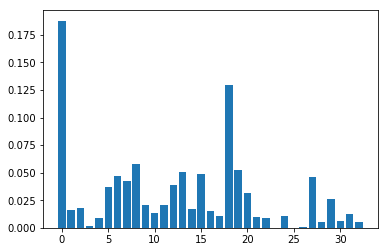

In [14]:
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

st = datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

print(datetime.now()-st)

y_pred = clf.predict(X_test)
submission_file_name = 'Submission_'

accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))

final_pred = pd.DataFrame(clf.predict_proba(np.array(finalTest)))
dfSub = pd.concat([test_member_id, final_pred.ix[:, 1:2]], axis=1)
dfSub.rename(columns={1:'loan_status'}, inplace=True)
dfSub.to_csv((('%s.csv') % (submission_file_name)), index=False)

import matplotlib.pyplot as plt
print(clf.feature_importances_)
idx = 0
for x in list(finalTrain):
    print('%d %s' % (idx, x))
    idx = idx + 1
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()